### Pipeline 1: Data from Web APIs to a Data Warehouse

Use Case: Extract data from a public API, transform it, and load it into a data warehouse for analysis (e.g., weather data, financial data).


#### Importing necessary libraries

In [1]:
import json
import requests
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
import os

def load_api_key(filepath):
    with open(filepath, 'r') as file:
        for line in file:
            if line.startswith("OPENWEATHER_API_KEY"):
                key = line.strip().split('=')[1]
                return key
    return None

# Load the API key from the config file
api_key = load_api_key("config.txt")

# Use the API key in your request
city = "Little Rock"
url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}"

response = requests.get(url)
weather_data = response.json()

# print(weather_data)


In [ ]:
# # import json

# # Pretty print the JSON output
# print(json.dumps(weather_data, indent=4))


In [19]:
# Create a function to convert temperature from Kelvin to Celsius

def kelvin_to_celsius(temp_k):
    return temp_k - 273.15

In [25]:
# To check how many forecast records should be returned

print(len(data['list']))  

40


In [21]:
if response.status_code == 200:
    data = response.json()
    weather_data = []

    # Iterate over the 'list' of forecast records
    for forecast in data['list']:
        date_time = datetime.utcfromtimestamp(forecast['dt']).strftime('%Y-%m-%d %H:%M:%S')
        temp = kelvin_to_celsius(forecast['main']['temp'])
        feels_like = kelvin_to_celsius(forecast['main']['feels_like'])
        pressure = forecast['main']['pressure']
        humidity = forecast['main']['humidity']
        weather_main = forecast['weather'][0]['main']
        weather_description = forecast['weather'][0]['description']
        wind_speed = forecast['wind']['speed']
        wind_direction = forecast['wind']['deg']
        cloudiness = forecast['clouds']['all']
        rain_volume = forecast.get('rain', {}).get('3h', 0)
        snow_volume = forecast.get('snow', {}).get('3h', 0)

        # Append the weather data for each forecast
        weather_data.append({
            "DateTime": date_time,
            "Temperature": temp,
            "Feels Like_temp": feels_like,
            "Pressure(hPa)": pressure,
            "Humidity_percent": humidity,
            "Weather": weather_main,
            "Weather Description": weather_description,
            "Wind Speed": wind_speed,
            "Wind Direction": wind_direction,
            "Cloudiness": cloudiness,
            "Rain Volume(mm)": rain_volume,
            "Snow Volume(mm)": snow_volume
        })

    # Create DataFrame with the weather data
    df = pd.DataFrame(weather_data)
    # Display the DataFrame (this will now show all rows)
    
else:
    print(f"Failed to get data: {response.status_code}")

df.head(len(df))



,DateTime,Temperature,Feels Like_temp,Pressure(hPa),Humidity_percent,Weather,Weather Description,Wind Speed,Wind Direction,Cloudiness,Rain Volume(mm),Snow Volume(mm)
0,2024-09-19 15:00:00,21.38,21.61,1014,78,Clear,clear sky,1.24,118,0,0.00,0
1,2024-09-19 18:00:00,27.48,28.53,1014,58,Clear,clear sky,0.74,139,0,0.00,0
2,2024-09-19 21:00:00,32.26,32.66,1012,40,Clear,clear sky,1.45,115,0,0.00,0
3,2024-09-20 00:00:00,27.03,27.98,1011,58,Clear,clear sky,2.78,114,0,0.00,0
4,2024-09-20 03:00:00,24.15,24.32,1011,65,Clear,clear sky,2.50,116,0,0.00,0
5,2024-09-20 06:00:00,22.38,22.55,1012,72,Clear,clear sky,1.93,149,1,0.00,0
6,2024-09-20 09:00:00,21.57,21.69,1012,73,Clouds,few clouds,1.22,202,20,0.00,0
7,2024-09-20 12:00:00,21.09,21.16,1013,73,Clouds,few clouds,1.42,203,13,0.00,0
8,2024-09-20 15:00:00,27.56,28.21,1014,53,Clouds,few clouds,2.04,196,23,0.00,0
9,2024-09-20 18:00:00,33.22,34.59,1012,42,Clouds,few clouds,1.78,194,15,0.00,0


In [27]:
## Convert ".ipynb" to ".py"

!jupyter nbconvert --to script weather_api_etl_pipeline_postgresql.ipynb

[NbConvertApp] Converting notebook weather_api_etl_pipeline_postgresql.ipynb to script
[NbConvertApp] Writing 3260 bytes to weather_api_etl_pipeline_postgresql.py


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DateTime             40 non-null     object 
 1   Temperature          40 non-null     float64
 2   Feels Like_temp      40 non-null     float64
 3   Pressure(hPa)        40 non-null     int64  
 4   Humidity_percent     40 non-null     int64  
 5   Weather              40 non-null     object 
 6   Weather Description  40 non-null     object 
 7   Wind Speed           40 non-null     float64
 8   Wind Direction       40 non-null     int64  
 9   Cloudiness           40 non-null     int64  
 10  Rain Volume(mm)      40 non-null     float64
 11  Snow Volume(mm)      40 non-null     int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 3.9+ KB


#### Trend Plot (Tempearature Trend Over Time)

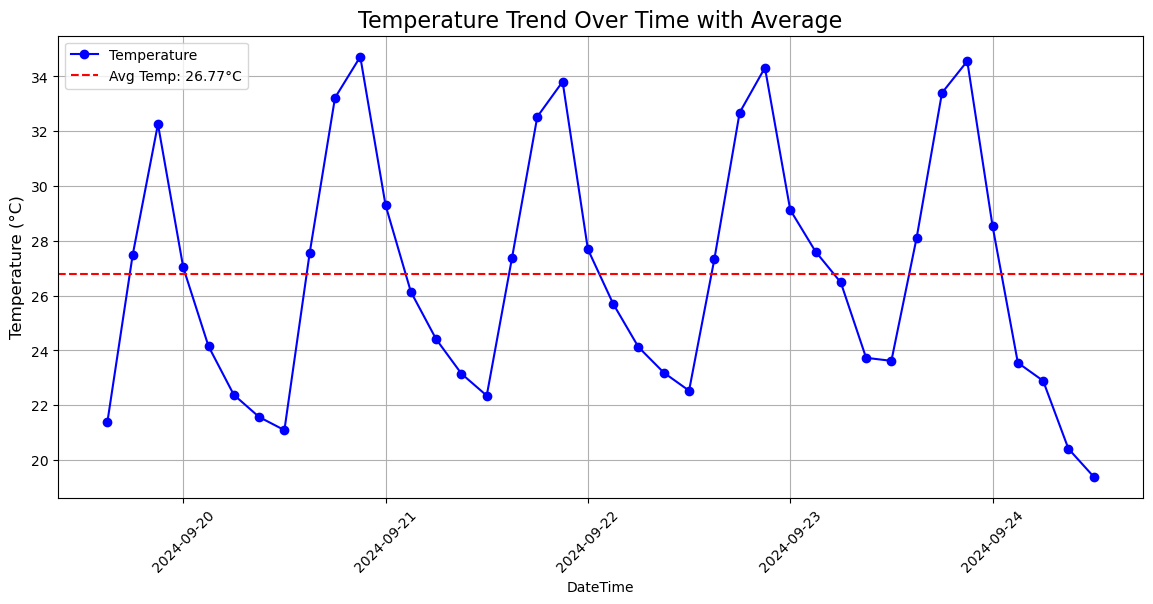

In [65]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Calculate the average temperature
average_temp = df['Temperature'].mean()

# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(df['DateTime'], df['Temperature'], marker='o', linestyle='-', color='b', label='Temperature')

# Add the red line for the average temperature
plt.axhline(y=average_temp, color='r', linestyle='--', label=f'Avg Temp: {average_temp:.2f}°C')

# Add labels and title
plt.title('Temperature Trend Over Time with Average', fontsize=16)
plt.xlabel('DateTime', fontsize=10)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [45]:
## For an interactive plot we can use Plotly

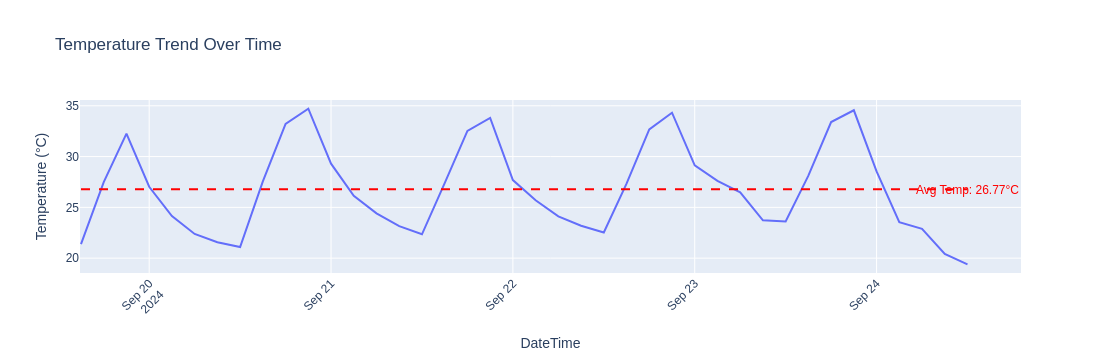

In [57]:
import plotly.express as px
import plotly.graph_objects as go

# Calculate the average temperature
average_temp = df['Temperature'].mean()

# Create an interactive line plot with Plotly
fig = px.line(df, x='DateTime', y='Temperature', title='Temperature Trend Over Time')

# Add a red line for the average temperature
fig.add_shape(
    type='line',
    x0=df['DateTime'].min(),
    x1=df['DateTime'].max(),
    y0=average_temp,
    y1=average_temp,
    line=dict(color='red', dash='dash'),
)

# Add annotation for the average temperature
fig.add_annotation(
    x=df['DateTime'].max(),  # Position the annotation on the right
    y=average_temp,
    text=f"Avg Temp: {average_temp:.2f}°C",
    showarrow=False,
    font=dict(color='red')
)

# Customize the layout for better visibility
fig.update_layout(xaxis_title='DateTime', yaxis_title='Temperature (°C)', xaxis_tickangle=-45)

# Show the plot
fig.show()

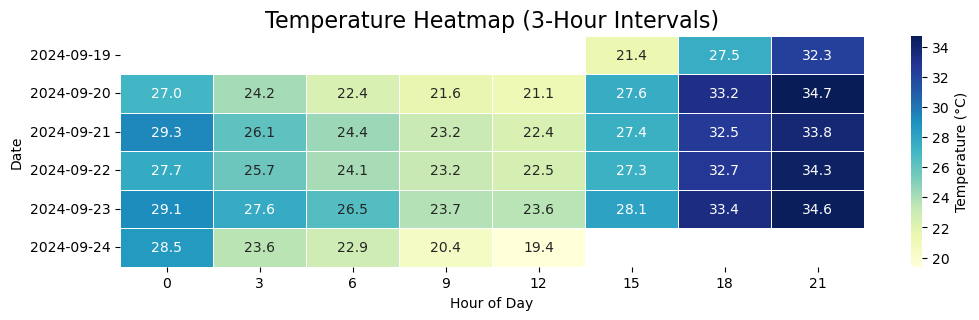

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df already has the 'DateTime' and 'Temperature' columns
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Create new columns for the day and hour from 'DateTime'
df['Day'] = df['DateTime'].dt.date  # Extract date
df['Hour'] = df['DateTime'].dt.hour  # Extract hour

# Pivot the DataFrame to create a matrix of days and hours
temp_pivot = df.pivot(index='Day', columns='Hour', values='Temperature')

# Set the size of the heatmap
plt.figure(figsize=(12, 3))

# Create the heatmap
sns.heatmap(temp_pivot, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.5, cbar_kws={'label': 'Temperature (°C)'})

# Add labels and a title
plt.title('Temperature Heatmap (3-Hour Intervals)', fontsize=16)
plt.xlabel('Hour of Day', fontsize=10)
plt.ylabel('Date', fontsize=10)

# Show the heatmap
plt.show()
